In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score

# Load the dataset
df1 = pd.read_csv(r"../datasets/processed_weather_data.csv")
# Preprocess the data
df = pd.read_csv(r"../datasets/weather_data_target.csv")

### Machine learning 

* ML model selection
    - At this point of the project, I'll start the process to perform the __KNN - K Nearest Neighbors__ to practice and consolidate the knowledge acquired during the classes (2025/06/17).

In [58]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Dryness
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,0
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,0
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,0
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,0


The Scaling of the dataset was done on the "weather_classification_analysis_final" notebook.
* The method chosen to scale was StandardScaling

In [59]:
df1.head()

,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


### Starting KNN application

    Following the assignment directions I'll apply 70/30 and 60/40 data split.

#### 70/30

__UP SAMPLING TRAINING DATAPOINTS__

In [60]:
X = df1
y = df['Dryness']

smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [61]:
# Split the data into features and target variable

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.30, random_state=42)

In [62]:
#Test different values of k to perform KNN
error_rates = []
k_values = range(1, 50)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    Y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, Y_pred)  # Calculate error rate
    error_rates.append(error)

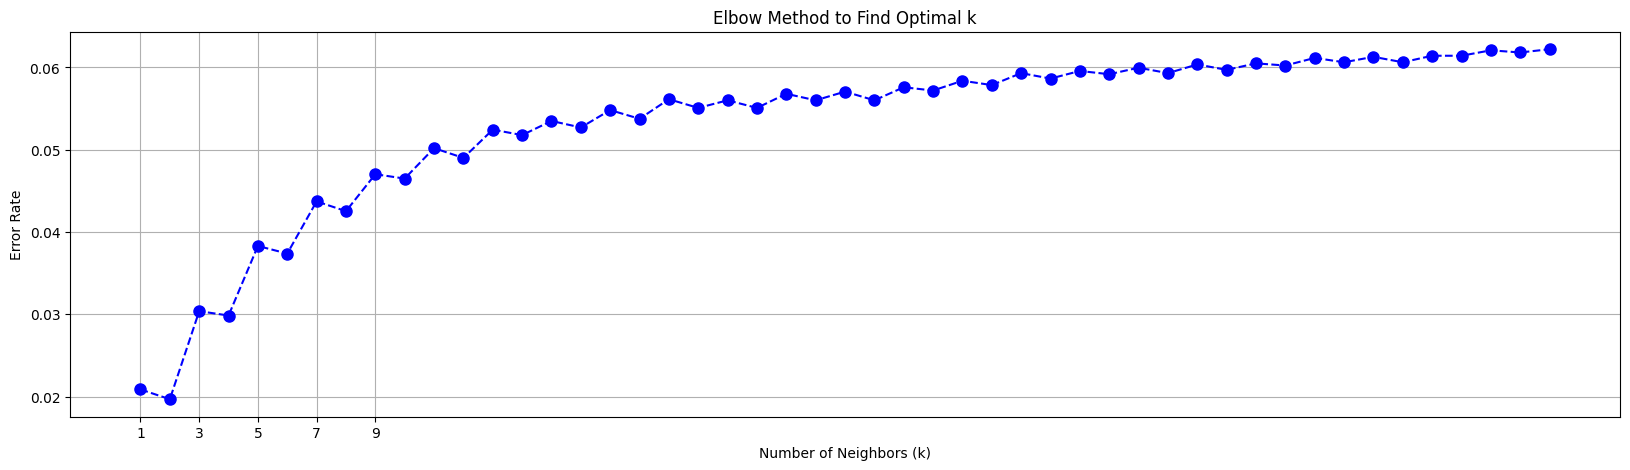

In [63]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 10, step=2))
plt.grid(True)
plt.show()

### Observation: The error rate significantly decreased when k=2. After that, we don't see any further dip. 

In [64]:
### Calculate test accuracy when k=2
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train, y_train)
Y_pred_2 = knn_2.predict(X_test)
print(f"Accuracy score for KNN with 2 neighbors : {accuracy_score(y_test, Y_pred_2)}")

Accuracy score for KNN with 2 neighbors : 0.9803196407343812


In [65]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [66]:
#Calculate cross validation score k=2
score_k_2 = cross_val_score(knn_2, X_train, y_train, cv=5) #cv means 5-fold cross validation
avg_score_k_2 = mean(score_k_2)

print(f"Average score for 2 neighbors: {avg_score_k_2}")


Average score for 2 neighbors: 0.9784885366544014


In [68]:
cross_val_scores = cross_val_score(knn, X_train, y_train, cv=5)
print(f"Cross-validation scores 70/30: {cross_val_scores}")

Cross-validation scores 70/30: [0.93376734 0.93659779 0.93829607 0.92782338 0.9360317 ]


### 60/40

In [ ]:
X = df1
y = df['Dryness']

smote = SMOTE(random_state=42)
X_upsampled, y_upsampled = smote.fit_resample(X, y)

In [ ]:
# Split the data into features and target variable

X_train, X_test, y_train, y_test = train_test_split(X_upsampled, y_upsampled, test_size=0.4, random_state=42)

__UP SAMPLING TRAINING DATAPOINTS__

In [ ]:
#Test different values of k to perform KNN
error_rates = []
k_values = range(1, 50)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)  # Train the model
    Y_pred = knn.predict(X_test)  # Predict on test set
    error = 1 - accuracy_score(y_test, Y_pred)  # Calculate error rate
    error_rates.append(error)

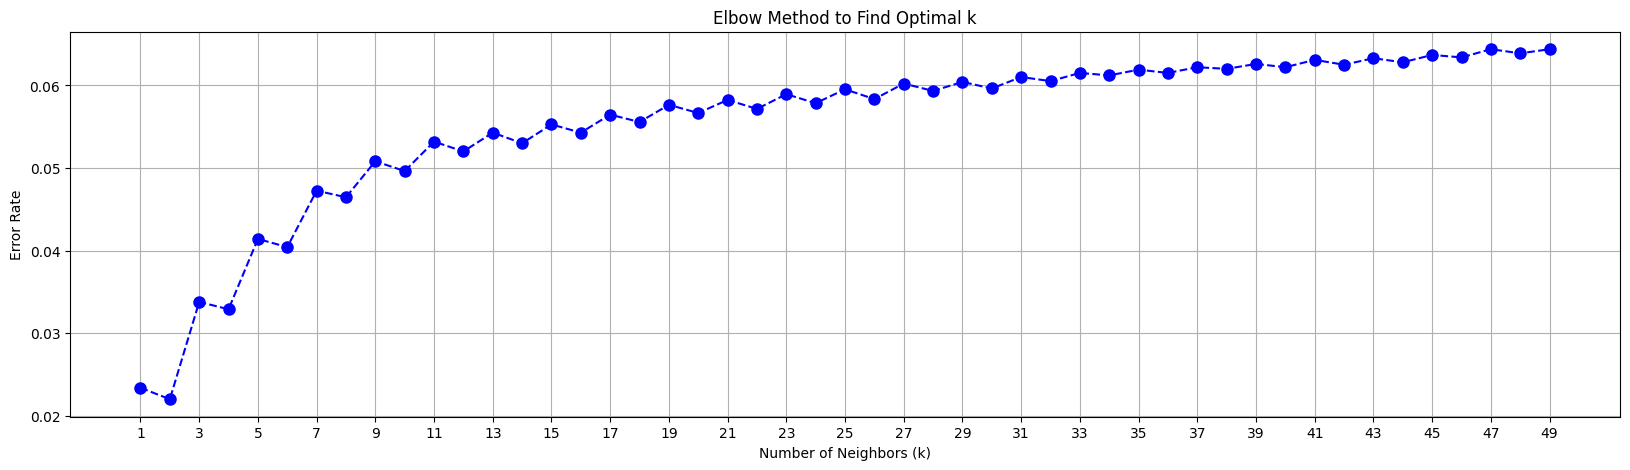

In [ ]:
#Plot the elbow curve to find the optimal value of k
plt.figure(figsize=(20, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='dashed', color='b', markersize=8)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.title('Elbow Method to Find Optimal k')
plt.xticks(np.arange(1, 50, step=2))
plt.grid(True)
plt.show()

### Observation: The error rate significantly decreased when k=7. After that, we don't see any further dip. 

In [ ]:
### Calculate test accuracy when k=2
knn_2 = KNeighborsClassifier(n_neighbors=2)
knn_2.fit(X_train, y_train)
Y_pred_2 = knn_2.predict(X_test)
print(f"Accuracy score for KNN with 2 neighbors : {accuracy_score(y_test, Y_pred_2)}")

Accuracy score for KNN with 2 neighbors : 0.9780089153046062


In [ ]:
from sklearn.model_selection import cross_val_score
from statistics import mean

In [ ]:
#Calculate cross validation score k=2
score_k_2 = cross_val_score(knn_2, X_train, y_train, cv=5) #cv means 5-fold cross validation
avg_score_k_2 = mean(score_k_2)

print(f"Average score for 2 neighbors: {avg_score_k_2}")


Average score for 2 neighbors: 0.9780069194614979


In [69]:
cross_val_scores = cross_val_score(knn_2, X_train, y_train, cv=5)
print(f"Cross-validation scores 60/40: {cross_val_scores}")

Cross-validation scores 60/40: [0.97367676 0.98160204 0.98160204 0.97594113 0.97962072]


COMPARACING BETWEEN - 70/30 AND 60/40

 70/30:
 - Accuracy score for KNN with 2 neighbors : 0.9803196407343812
 - Average score for 2 neighbors: 0.9784885366544014

 60/40:
 - Accuracy score for KNN with 2 neighbors : 0.959659090909091
 - Average score for 2 neighbors: 0.9780069194614979